In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_absolute_error
from pprint import pprint
import plotly.graph_objs as go
from plotly.offline import iplot
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import joblib 
from sklearn import preprocessing
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn import model_selection


In [2]:
!pip install matplotlib==3.2.0

- _Load in the red wine data from the UCI ML website._

In [3]:
data = pd.read_csv(r'./datasource/Wines.csv')
df = pd.DataFrame(data, columns=[ 'fixed acidity', 'volatile acidity','citric acid' , 'residual sugar' ,'chlorides' , 'free sulfur dioxide','density', 'pH' ,'sulphates','alcohol','quality'
                        ])


- _Let's investigate data set_

In [4]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,0.9968,3.36,0.57,9.5,7
9,6.7,0.58,0.08,1.8,0.097,15.0,0.9959,3.28,0.54,9.2,5


- _Let's check how the data is distributed_

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   fixed acidity        1143 non-null   float64
 1   volatile acidity     1143 non-null   float64
 2   citric acid          1143 non-null   float64
 3   residual sugar       1143 non-null   float64
 4   chlorides            1143 non-null   float64
 5   free sulfur dioxide  1143 non-null   float64
 6   density              1143 non-null   float64
 7   pH                   1143 non-null   float64
 8   sulphates            1143 non-null   float64
 9   alcohol              1143 non-null   float64
 10  quality              1143 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 98.4 KB


- _Let’s have a look at data dimensionality, feature names, and feature types. (1599<- rows, 12<-colums)_

In [6]:
df.shape

(1143, 11)

- _Let’s printing out column names_

In [7]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'density', 'pH', 'sulphates',
       'alcohol', 'quality'],
      dtype='object')

- _The describe method shows basic statistical characteristics of each numerical feature_

In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
sorted_df=df.sort_values(by='quality', ascending=False)
sorted_df.head(100)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality
197,10.3,0.320,0.45,6.4,0.073,5.0,0.99760,3.23,0.82,12.6,8
349,10.7,0.350,0.53,2.6,0.070,5.0,0.99720,3.15,0.65,11.0,8
1030,7.2,0.380,0.31,2.0,0.056,15.0,0.99472,3.23,0.76,11.3,8
190,7.9,0.350,0.46,3.6,0.078,15.0,0.99730,3.35,0.86,12.8,8
1104,7.4,0.360,0.30,1.8,0.074,17.0,0.99419,3.24,0.70,11.4,8
...,...,...,...,...,...,...,...,...,...,...,...
842,7.2,0.250,0.37,2.5,0.063,11.0,0.99439,3.52,0.80,12.4,7
236,7.9,0.650,0.01,2.5,0.078,17.0,0.99630,3.34,0.74,11.7,7
237,11.9,0.695,0.53,3.4,0.128,7.0,0.99920,3.17,0.84,12.2,7
240,12.5,0.280,0.54,2.3,0.082,12.0,0.99970,3.11,1.36,9.8,7


- _Get mean for all colum with highest mark_

In [10]:
print(df[df['quality'] == 8].mean())

fixed acidity           8.806250
volatile acidity        0.410000
citric acid             0.432500
residual sugar          2.643750
chlorides               0.070187
free sulfur dioxide    11.062500
density                 0.995553
pH                      3.240625
sulphates               0.766250
alcohol                11.937500
quality                 8.000000
dtype: float64


- _Create pivot\_table_

In [11]:
colum_names = ['fixed acidity', 'volatile acidity','citric acid' , 'residual sugar' ,'chlorides' , 'free sulfur dioxide','density', 'pH' ,'sulphates','alcohol']
df_pivot_table = df.pivot_table(colum_names,['quality'], aggfunc='median')

df_pivot_table

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,residual sugar,sulphates,volatile acidity
quality,,,,,,,,,,
3,9.825,0.0800,0.050,0.997565,7.45,5.5,3.355,2.1,0.56,0.8175
4,10.000,0.0780,0.070,0.996640,7.60,12.0,3.380,2.1,0.56,0.6750
5,9.700,0.0810,0.230,0.996920,7.80,14.0,3.300,2.2,0.58,0.5900
6,10.500,0.0785,0.245,0.996520,7.90,14.0,3.320,2.2,0.64,0.5000
7,11.600,0.0730,0.400,0.995680,8.70,12.0,3.270,2.3,0.74,0.3600
8,11.750,0.0715,0.455,0.995580,8.85,6.5,3.225,2.1,0.73,0.3550


- _Corelation matrix_

In [12]:
corr_matrix = df.corr()
corr_matrix["quality"].sort_values(ascending=False)

quality                1.000000
alcohol                0.484866
sulphates              0.257710
citric acid            0.240821
fixed acidity          0.121970
residual sugar         0.022002
pH                    -0.052453
free sulfur dioxide   -0.063260
chlorides             -0.124085
density               -0.175208
volatile acidity      -0.407394
Name: quality, dtype: float64

***
## Data visualization
***

- Data distribution

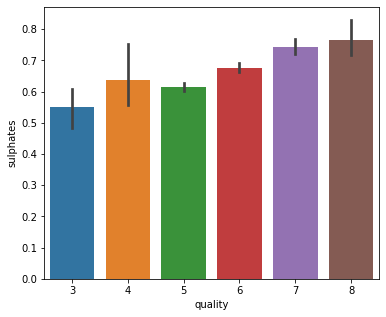

In [13]:
fig = plt.figure(figsize=(6, 5))
sns.barplot(x='quality', y='sulphates', data=df)
plt.show()

- Histograms

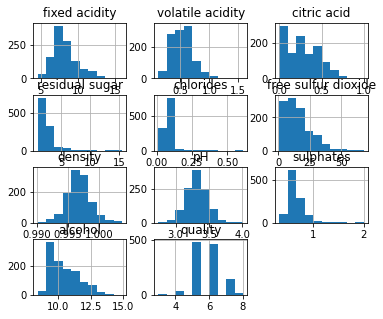

In [14]:
df.hist(bins=10,figsize=(6, 5))
plt.show()

- Density Plots

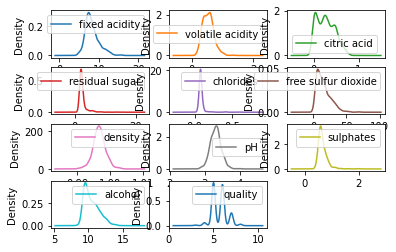

In [15]:
df.plot(kind='density', subplots=True, layout=(4,3), sharex=False)
plt.show()

/home/cytech/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



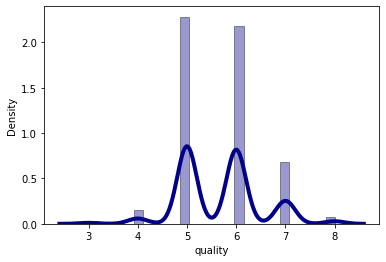

In [16]:
sns.distplot(df['quality'], hist=True, kde=True,
             bins='auto', color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.show()

- Column names

In [17]:
colum_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

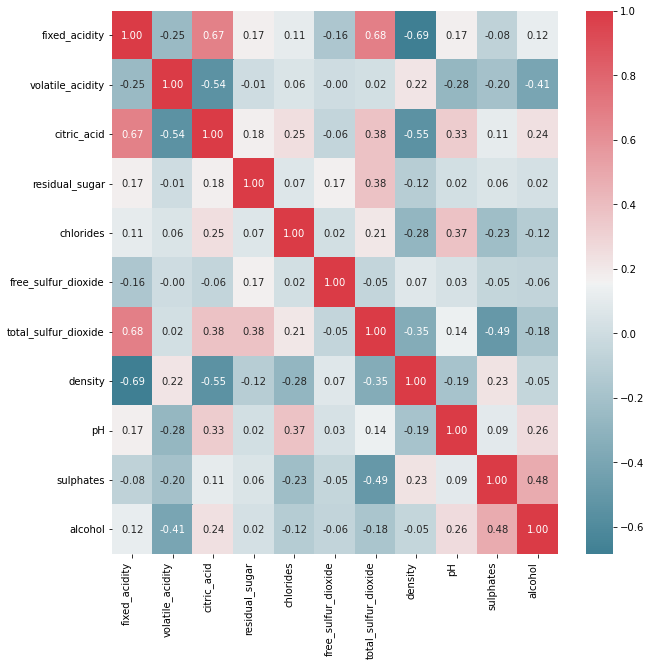

In [18]:
colum_names = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
# Correlation matrix
correlations = df.corr()
# Plot figsize
fig, ax = plt.subplots(figsize=(10, 10))
# Generate Color Map
colormap = sns.diverging_palette(220, 10, as_cmap=True)
# Generate Heat Map, allow annotations and place floats in map
sns.heatmap(correlations, cmap=colormap, annot=True, fmt=".2f")
ax.set_xticklabels(
    colum_names,
    rotation=90,
    horizontalalignment='right'
);
ax.set_yticklabels(colum_names);
plt.show()

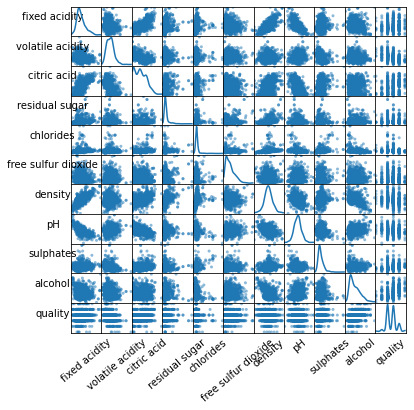

In [19]:
sm = scatter_matrix(df, figsize=(6, 6), diagonal='kde')
#Change label rotation
[s.xaxis.label.set_rotation(40) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]
#May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-0.6,0.5) for s in sm.reshape(-1)]
#Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]
plt.show()

***
## Data Preprocessing
***

+ Making classificaion for the response variable. 0 if the wine is a bad quality 1 otherwise.

In [97]:
# Create Classification version of target variable
df["good wine"] = [1 if i >= 7 else 0 for i in df['quality']]
X = df.drop(['quality','goodquality'], axis = 1)
X = data.drop(["quality"], axis = 1)
y = df["good wine"]
# See proportion of good vs bad wines
y.value_counts()

0    984
1    159
Name: good wine, dtype: int64

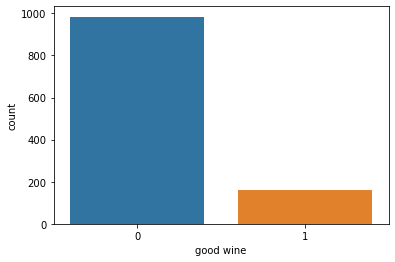

In [98]:
sns.countplot(y)
plt.show()

* Now seperate the dataset as response variable and feature variabes

In [99]:
# Normalize feature variables
from sklearn.preprocessing import StandardScaler
X_features = X
X = StandardScaler().fit_transform(X)

In [100]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

* Train and Test splitting of data

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

* Applying Standard scaling to get optimized result

In [102]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

***
## Machine learning algorithms
***

In [103]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

_Prepare configuration for cross validation test harness_

SupportVectorClassifier: 0.892774 (0.028767)
StochasticGradientDecentC: 0.864238 (0.028559)
RandomForestClassifier: 0.905889 (0.035662)
DecisionTreeClassifier: 0.863247 (0.038587)
GaussianNB: 0.843562 (0.028831)
KNeighborsClassifier: 0.875215 (0.022253)
AdaBoostClassifier: 0.878512 (0.027634)
LogisticRegression: 0.881785 (0.033930)


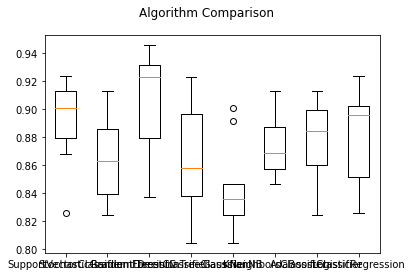

In [104]:
seed = 7
# prepare models
models = []
models.append(('SupportVectorClassifier', SVC()))
models.append(('StochasticGradientDecentC', SGDClassifier()))
models.append(('RandomForestClassifier', RandomForestClassifier()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('GaussianNB', GaussianNB()))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('AdaBoostClassifier', AdaBoostClassifier()))
models.append(('LogisticRegression', LogisticRegression()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10,  shuffle=True, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

**1) Support Vector Classifier (svc)**


In [105]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

_Grid Search CV (finding best parameters for svc model)_

In [106]:
def svc_param_selection(X, y, nfolds):
    param = {
        'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
        'kernel': ['linear', 'rbf'],
        'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4]
    }
    grid_search = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=nfolds)
    grid_search.fit(X,  y)
    return grid_search.best_params_

In [107]:
svc_param_selection(X_train, y_train,10)

{'C': 1.2, 'gamma': 0.8, 'kernel': 'rbf'}

_Best params had found  **{'C': 1.3, 'gamma': 1.3, 'kernel': 'rbf'}**_

_Let's run our SVC again with the best parameters._

In [108]:

svc2 = SVC(C = 1.3, gamma =  1.3, kernel= 'rbf')
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print('Confusion matrix')
print(confusion_matrix(y_test, pred_svc2))
print('Classification report')
print(classification_report(y_test, pred_svc2))
print('Accuracy score',accuracy_score(y_test, pred_svc2))


Confusion matrix
[[191   0]
 [ 31   7]]
Classification report
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       191
           1       1.00      0.18      0.31        38

    accuracy                           0.86       229
   macro avg       0.93      0.59      0.62       229
weighted avg       0.88      0.86      0.82       229

Accuracy score 0.8646288209606987


**2) Stochastic Gradient Decent Classifier**

In [109]:
sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=60)
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)

**3) Random Forest Classifier**


In [110]:
rfc = RandomForestClassifier(n_estimators=200, max_depth=20,
                             random_state=0)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

**4) KNeighborsClassifier**

In [111]:
n_neighbors = 2

for weights in ['uniform', 'distance']:
    nbrs = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights)
    nbrs.fit(X_train,y_train)
    pred_nbrs = nbrs.predict(X_test)
    print('KNeighborsClassifier', weights)
    print(classification_report(y_test, pred_nbrs))


KNeighborsClassifier uniform
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       191
           1       0.50      0.13      0.21        38

    accuracy                           0.83       229
   macro avg       0.67      0.55      0.56       229
weighted avg       0.79      0.83      0.79       229

KNeighborsClassifier distance
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       191
           1       0.61      0.53      0.56        38

    accuracy                           0.86       229
   macro avg       0.76      0.73      0.74       229
weighted avg       0.86      0.86      0.86       229



**5) AdaBoostClassifier**

In [112]:
ada_classifier = AdaBoostClassifier(n_estimators=100)
ada_classifier.fit(X_train, y_train)
pred_ada = ada_classifier.predict(X_test)

**6) Evaluate model**

In [113]:

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(mean_absolute_error(test_labels,predictions)))
    print('Accuracy = {:0.2f}%.'.format(accuracy_score(test_labels,predictions)*100))

In [114]:
evaluate(svc,X_test,y_test)
evaluate(svc2,X_test,y_test)
evaluate(sgd,X_test,y_test)
evaluate(rfc,X_test,y_test)
evaluate(ada_classifier,X_test,y_test)

Model Performance
Average Error: 0.1441 degrees.
Accuracy = 85.59%.
Model Performance
Average Error: 0.1354 degrees.
Accuracy = 86.46%.
Model Performance
Average Error: 0.1834 degrees.
Accuracy = 81.66%.
Model Performance
Average Error: 0.1354 degrees.
Accuracy = 86.46%.
Model Performance
Average Error: 0.1310 degrees.
Accuracy = 86.90%.


**7) Cross Validation**

In [115]:
scores = cross_val_score(ada_classifier,X_test,y_test, cv=5)
scores.mean()

0.8471497584541062

In [116]:
# 5. Declare hyperparameters to tune
grid_params = {
    'n_estimators': [100, 300, 500, 700, 1000],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]  
}
forest = RandomForestClassifier(random_state = 1)
modelF = forest.fit(X_train, y_train)
y_predF = modelF.predict(X_test)
grid_search = GridSearchCV(
    estimator=forest,
    param_grid=grid_params,
    scoring='accuracy',
    cv=4, # number of folds
    n_jobs=-1 # all available computing power
)

grid_search.fit(X_train, y_train)



best_parameters = grid_search.best_params_
print('Best parameters:', 
      best_parameters)

best_result = grid_search.best_score_
print('Best accuracy:', best_result)



Best parameters: {'bootstrap': False, 'criterion': 'entropy', 'n_estimators': 300}
Best accuracy: 0.9168581935187313


In [117]:
forestOpt = RandomForestClassifier(random_state = 1, max_depth = 15,     n_estimators = 500, min_samples_split = 2, min_samples_leaf = 1)
                                   
modelOpt = forestOpt.fit(X_train, y_train)
y_pred = modelOpt.predict(X_test)

In [125]:
#8 Refit on the entire trainning set
#No additionnal code needed if modelOpt.refit == True (default is True)

In [119]:
#9 Evaluate model on test data
pred = modelOpt.predict(X_test)
print( r2_score(y_test, pred))
print( mean_squared_error(y_test, pred))

#10 Sav model for future use
joblib.dump(modelOpt, 'rf_classifier.pkl')
#To load: modelOpt2 = joblib.load('rf_classifier.plk')

0.11656103609809876
0.1222707423580786


['rf_classifier.pkl']

**8) Feature importance**

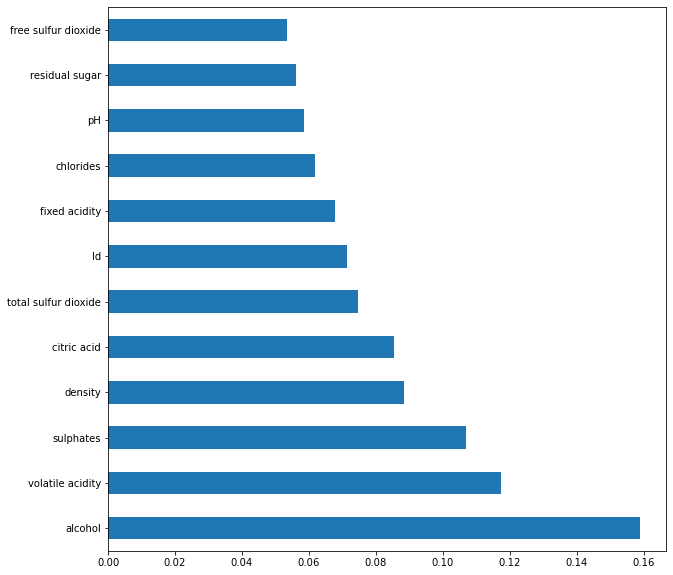

In [120]:
feat_importances = pd.Series(modelOpt.feature_importances_, index=X_features.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

In [122]:
print(np.average(df[df["good wine"] == 1].alcohol))
print(np.average(df[df["good wine"] == 0].alcohol))

11.528406708595389
10.266581978319785


In [123]:
print(np.average(df[df["good wine"] == 1].sulphates))
print(np.average(df[df["good wine"] == 0].sulphates))

0.7458490566037737
0.6434654471544716


In [124]:
df_good = df[df["good wine"] == 1]
df_bad = df[df["good wine"] == 0]
print(np.average(df_good["volatile acidity"]))
print(np.average(df_bad["volatile acidity"]))

0.395314465408805
0.5533180894308942
